**Критерий Уилкоксона-Манна-Уитни** 

In [1]:
import random
from scipy.stats import norm, binom, expon, wilcoxon
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

Два нормальных распределения с одинаковыми ско и разными средними

In [3]:
x = norm.rvs(size = 500, loc = 0, scale = 1)
y = norm.rvs(size = 500, loc = 1, scale = 1)

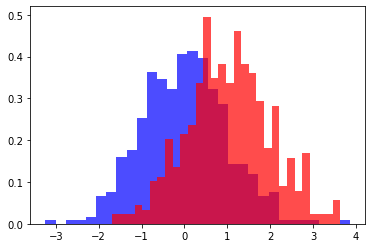

In [4]:
plt.hist(x, bins=30, density=True, color='blue', alpha=0.7)
plt.hist(y, bins=30, density=True, color='red', alpha=0.7)
plt.show()

In [5]:
wilcoxon(x, y)


WilcoxonResult(statistic=19619.0, pvalue=2.1659176384525174e-40)

Два нормальных с разницей в с.к.о (критерий разницу не видит)

In [6]:
# Разницу в с.к.о. нормального распределения тест не распознает

x = norm.rvs(size = 500, loc = 0, scale = 1)
y = norm.rvs(size = 500, loc = 0, scale = 50)

wilcoxon(x, y)

WilcoxonResult(statistic=60022.0, pvalue=0.4206453130104407)

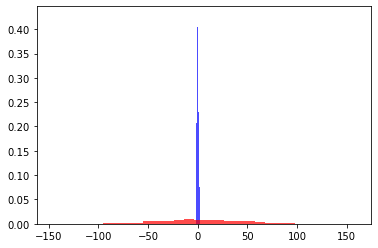

In [7]:
plt.hist(x, bins=30, density=True, color='blue', alpha=0.7)
plt.hist(y, bins=30, density=True, color='red', alpha=0.7)
plt.show()

Биномиальное и экспоненциальное с одинаковыми (почти) средними

In [8]:
x = binom.rvs(size=300, n=1, p=0.18)
y = expon.rvs(size=300, scale=0.2)
print(np.mean(x))
print(np.mean(y))

0.16666666666666666
0.19733118364373312


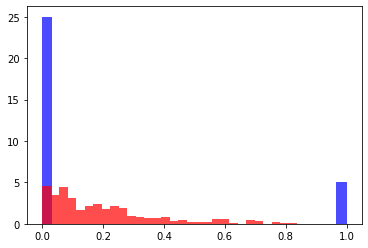

In [9]:
plt.hist(x, bins=30, density=True, color='blue', alpha=0.7)
plt.hist(y, bins=30, density=True, color='red', alpha=0.7)
plt.show()

In [10]:
# Тест Уилкоксона-Манна-Уитни показал разницу в выборках
wilcoxon(x, y)

WilcoxonResult(statistic=13529.0, pvalue=1.791887908835471e-09)

In [11]:
# Нормальность не проверили, поэтому Стьюдент не увидел разницу
res = sm.stats.ttest_ind(x, y)
print("t =", res[0])
print("p-value =", res[1])
print("df = ", res[2])

t = -1.279844568595127
p-value = 0.20109609056416905
df =  598.0
